In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Comparison of long-read aligner performance when mapping split-reads

In [40]:
path=''
bwa = pd.read_csv(f"{path}/bwa/bwa.mappings_labelled.csv", sep = '\t')
bwa_dodi = pd.read_csv(f"{path}/bwa/bwa_dodi.mappings_labelled.csv", sep = '\t')
minimap2 = pd.read_csv(f"{path}/split_reads/minimap2/minimap2.mappings_labelled.csv", sep = '\t')
minimap2_dodi = pd.read_csv(f"{path}/minimap2/minimap2_dodi.mappings_labelled.csv", sep = '\t')
last = pd.read_csv(f"{path}/last/lastal_lastsplit.mappings_labelled.csv", sep = '\t')
last_dodi = pd.read_csv(f"{path}/last/lastal_dodi.mappings_labelled.csv", sep = '\t')
ngmlr=pd.read_csv(f"{path}/ngmlr/ngmlr.mappings_labelled.csv", sep = '\t')

In [ ]:
def create_bins(df, base):
    bins = []
    b=base
    for i in df['aln_size']:
        bins.append(base * round(i/base))
    df = df.assign(bins=b)
    return df

In [ ]:
def precision_ins_size(df):
    bin_precision = []
    bin_id = []
    s = []
    for bid, b in df.groupby('bins'):
        s.append(len(b))
        bin_precision.append(b['tp'].sum() / (b['tp'].sum() + b['fp'].sum()))
        bin_id.append(bid)
    return bin_precision, bin_id, s

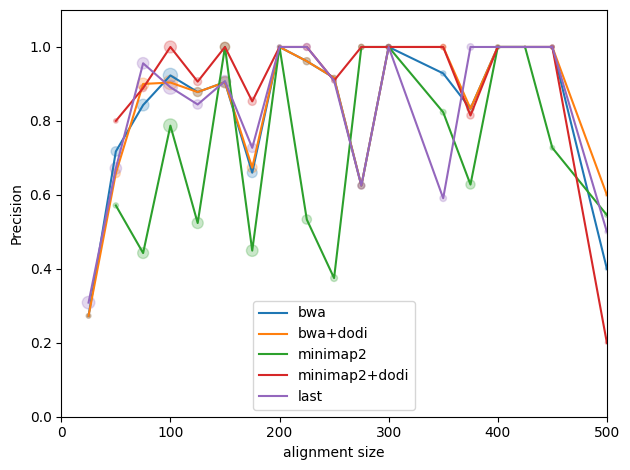

In [42]:
bwa = create_bins(bwa, 25)
bwa_dodi = create_bins(bwa_dodi, 25)
minimap2 = create_bins(minimap2, 25)
minimap2_dodi = create_bins(minimap2_dodi, 25)
last = create_bins(last, 25)
last_dodi = create_bins(last_dodi, 25)
ngmlr = create_bins(ngmlr, 25)

bin_precision_bwa , bin_id_bwa , s_bwa = precision_ins_size(bwa)  
bin_precision_bwa_dodi, bin_id_bwa_dodi, s_bwa_dodi = precision_ins_size(bwa_dodi)   
bin_precision_minimap2, bin_id_minimap2, s_minimap2 = precision_ins_size(minimap2)
bin_precision_minimap2_dodi, bin_id_minimap2_dodi, s_minimap2_dodi = precision_ins_size(minimap2_dodi)   
bin_precision_last, bin_id_last, s_last = precision_ins_size(last)
bin_precision_last_dodi, bin_id_last_dodi, s_last_dodi = precision_ins_size(last_dodi)
bin_precision_ngmlr, bin_id_ngmlr, s_ngmlr = precision_ins_size(ngmlr)


path = '/Users/c23125562/Library/CloudStorage/OneDrive-CardiffUniversity/split_reads/'
plt.plot(bin_id_bwa, bin_precision_bwa, label='bwa')
plt.plot(bin_id_bwa_dodi, bin_precision_bwa_dodi, label='bwa+dodi')
plt.plot(bin_id_minimap2, bin_precision_minimap2, label='minimap2')
plt.plot(bin_id_minimap2_dodi, bin_precision_minimap2_dodi, label='minimap2+dodi')
plt.plot(bin_id_last, bin_precision_last, label='last')
plt.plot(bin_id_last_dodi, bin_precision_last_dodi, label='last+dodi')
plt.plot(bin_id_ngmlr, bin_precision_ngmlr, label='ngmlr')
plt.scatter(bin_id_bwa, bin_precision_bwa, s=s_bwa, alpha=0.25)
plt.scatter(bin_id_bwa_dodi, bin_precision_bwa_dodi, s=s_bwa_dodi, alpha=0.25)
plt.scatter(bin_id_minimap2, bin_precision_minimap2, s=s_minimap2, alpha=0.25)
plt.scatter(bin_id_minimap2_dodi, bin_precision_minimap2_dodi, s=s_minimap2_dodi, alpha=0.25)
plt.scatter(bin_id_last, bin_precision_last, s=s_last, alpha=0.25)
plt.scatter(bin_id_last_dodi, bin_precision_last_dodi, s=s_last_dodi, alpha=0.25)
plt.scatter(bin_id_ngmlr, bin_precision_ngmlr, s=s_ngmlr, alpha=0.25)
plt.legend()
plt.xlim(0, 500)
plt.xlabel('alignment size')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig(path + 'size_vs_precision.pdf')
plt.show()

In [ ]:
def precision_mapq(df):
    bin_precision = []
    bin_id = []
    s = []
    for bid, b in df.groupby('mapq'):
        s.append(len(b))
        bin_precision.append(b['tp'].sum() / (b['tp'].sum() + b['fp'].sum()))
        bin_id.append(bid)
    return bin_precision, bin_id, s

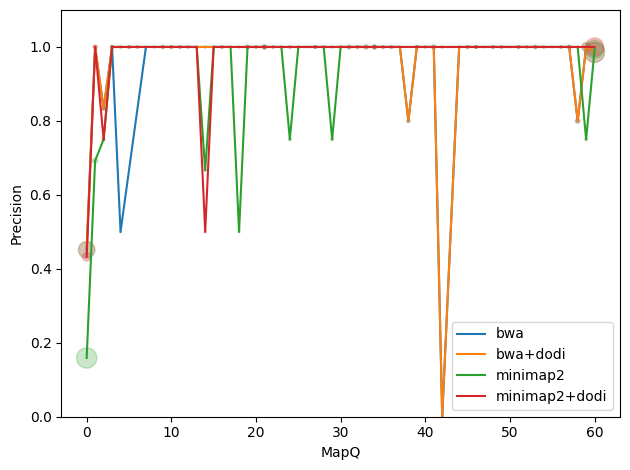

In [43]:
bin_precision_mapq_bwa , bin_id_mapq_bwa , s_mapq_bwa = precision_mapq(bwa)  
bin_precision_mapq_bwa_dodi, bin_id_mapq_bwa_dodi, s_mapq_bwa_dodi = precision_mapq(bwa_dodi)   
bin_precision_mapq_minimap2, bin_id_mapq_minimap2, s_mapq_minimap2 = precision_mapq(minimap2)
bin_precision_mapq_minimap2_dodi, bin_id_mapq_minimap2_dodi, s_mapq_minimap2_dodi = precision_mapq(minimap2_dodi)   
bin_precision_mapq_last, bin_id_mapq_last, s_mapq_last = precision_mapq(last)
bin_precision_mapq_last_dodi, bin_id_mapq_last_dodi, s_mapq_last_dodi = precision_mapq(last_dodi)
bin_precision_mapq_ngmlr, bin_id_mapq_ngmlr, s_mapq_ngmlr = precision_mapq(ngmlr)

plt.plot(bin_id_mapq_bwa, bin_precision_mapq_bwa, label='bwa')
plt.plot(bin_id_mapq_bwa_dodi, bin_precision_mapq_bwa_dodi, label='bwa+dodi')
plt.plot(bin_id_mapq_minimap2, bin_precision_mapq_minimap2, label='minimap2')
plt.plot(bin_id_mapq_minimap2_dodi, bin_precision_mapq_minimap2_dodi, label='minimap2+dodi')
plt.plot(bin_id_mapq_ngmlr, bin_precision_mapq_ngmlr, label='ngmlr')
plt.scatter(bin_id_mapq_bwa, bin_precision_bwa, s=s_mapq_bwa, alpha=0.25)
plt.scatter(bin_id_mapq_bwa_dodi, bin_precision_bwa_dodi, s=s_mapq_bwa_dodi, alpha=0.25)
plt.scatter(bin_id_mapq_minimap2, bin_precision_mapq_minimap2, s=s_mapq_minimap2, alpha=0.25)
plt.scatter(bin_id_mapq_minimap2_dodi, bin_precision_mapq_minimap2_dodi, s=s_mapq_minimap2_dodi, alpha=0.25)
plt.scatter(bin_id_mapq_ngmlr, bin_precision_mapq_ngmlr, s=s_mapq_ngmlr, alpha=0.25)
plt.legend()
plt.xlabel('MapQ')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig(path + 'mapq_vs_precision.pdf')

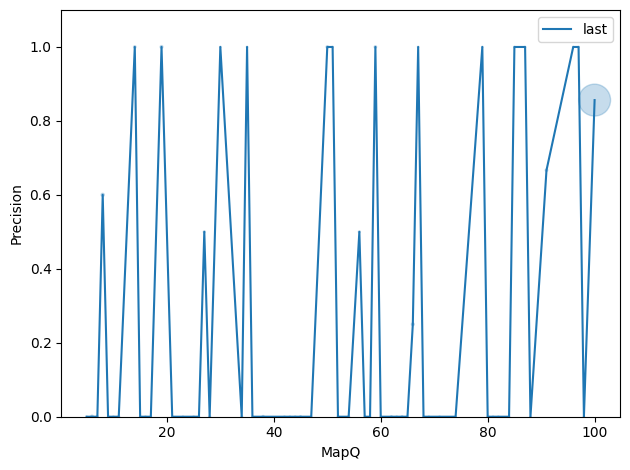

In [39]:
bin_precision_mapq_last , bin_id_mapq_last , s_mapq_last = precision_mapq(last)  
bin_precision_mapq_last_dodi , bin_id_mapq_last_dodi , s_mapq_last_dodi = precision_mapq(last_dodi)  

plt.plot(bin_id_last, bin_precision_last, label='last')
plt.plot(bin_id_last_dodi, bin_precision_last_dodi, label='last+dodi')
plt.scatter(bin_id_last, bin_precision_last, s=s_last, alpha=0.25)
plt.scatter(bin_id_last_dodi, bin_precision_last_dodi, s=s_last_dodi, alpha=0.25)

plt.legend()
plt.xlabel('MapQ')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig(prefix + 'last_mapq_vs_precision.pdf')